In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/PublicationsWAddresses.csv')

In [3]:
years = list(range(2000, 2024)) #Years exclusive 2024

In [4]:
# Filter the dataframe for the specified years
df_filtered = df[df['Year'].isin(years)]

# Group by Year and Country, then count the number of publications
yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

# Pivot the table to have years as rows and countries as columns
pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

# Sort the pivot table by year to ensure correct cumulative sum
pivot_df = pivot_df.sort_index()

# Compute the cumulative sum over the years
cumulative_df = pivot_df.cumsum()

# Create a title prefix based on department
title_prefix = f"Cumulative Publications" 


# Separate "National" (Denmark) and "International" (all other countries combined)
cumulative_df['International'] = cumulative_df.drop(columns='Denmark', errors='ignore').sum(axis=1)
cumulative_df['National'] = cumulative_df['Denmark'] if 'Denmark' in cumulative_df.columns else 0
result = cumulative_df[['National', 'International']].copy()
result['Relative'] = result['International'] / result['National']
result['Difference'] = result['International'] - result['National']

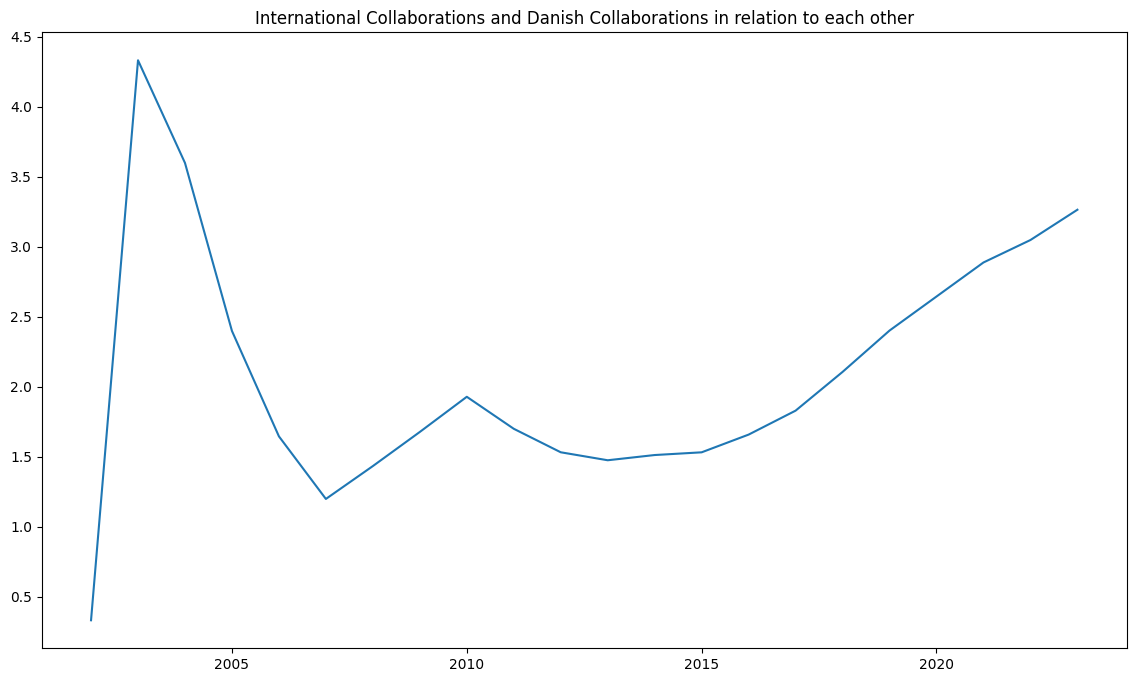

In [14]:
fix, ax = plt.subplots(figsize=(14, 8))
#ax.plot(result.index, result['Difference'], label='Difference')
plt.title('International Collaborations and Danish Collaborations in relation to each other')
ax.plot(result.index, result['Relative'], label='Relative')

In [6]:
for year, rel, dif in zip(result.index, result['Relative'], result['Difference']):
    print(f"{year}  -->  {round(rel, 2)} --> {int(dif)}")

2001  -->  inf --> 1
2002  -->  0.33 --> -2
2003  -->  4.33 --> 10
2004  -->  3.6 --> 13
2005  -->  2.4 --> 14
2006  -->  1.65 --> 11
2007  -->  1.2 --> 6
2008  -->  1.43 --> 20
2009  -->  1.68 --> 57
2010  -->  1.93 --> 119
2011  -->  1.7 --> 122
2012  -->  1.53 --> 128
2013  -->  1.48 --> 151
2014  -->  1.51 --> 207
2015  -->  1.53 --> 250
2016  -->  1.66 --> 341
2017  -->  1.83 --> 471
2018  -->  2.11 --> 691
2019  -->  2.4 --> 930
2020  -->  2.65 --> 1185
2021  -->  2.89 --> 1498
2022  -->  3.05 --> 1824
2023  -->  3.27 --> 2182


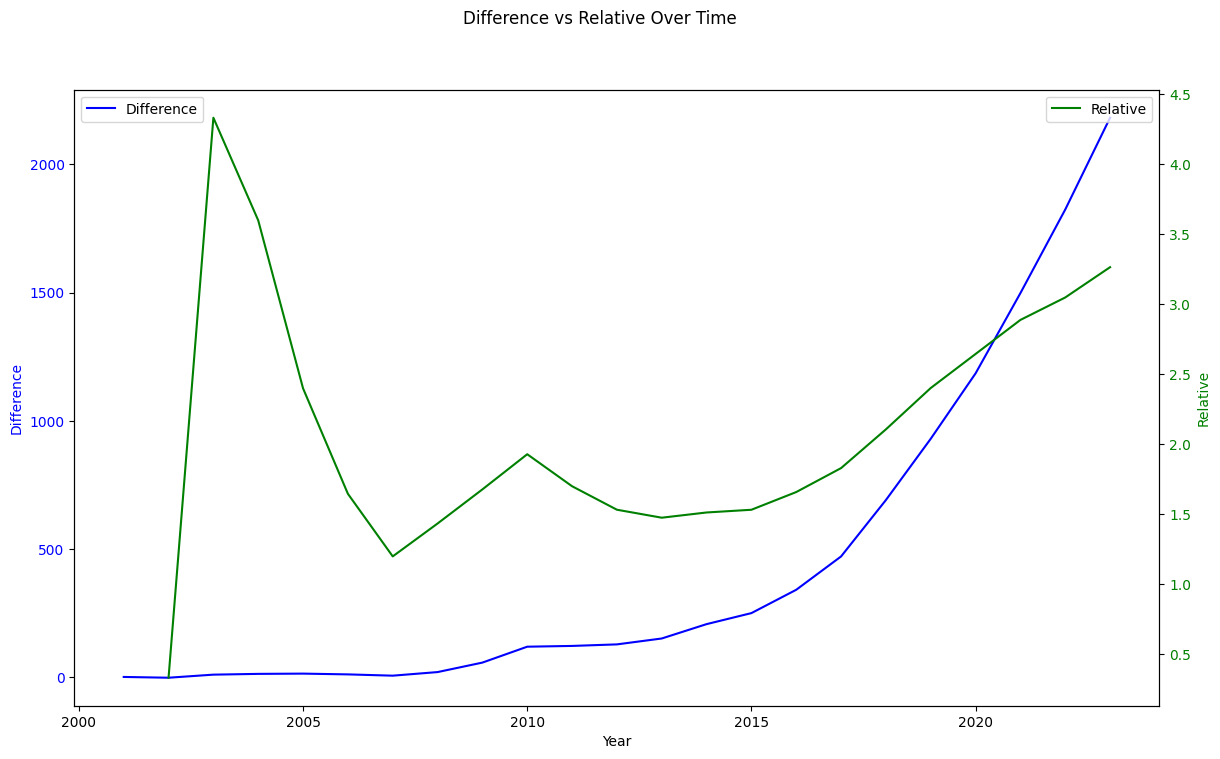

In [7]:
import matplotlib.pyplot as plt

# Assuming `result` DataFrame with index as years and columns 'Difference' and 'Relative'

fix, ax1 = plt.subplots(figsize=(14, 8))

# Plotting 'Difference'
ax1.plot(result.index, result['Difference'], label='Difference', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Difference', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for 'Relative'
ax2 = ax1.twinx()
ax2.plot(result.index, result['Relative'], label='Relative', color='g')
ax2.set_ylabel('Relative', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add titles and legends
fig = plt.gcf()
fig.suptitle('Difference vs Relative Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
